## SUPPORT VCTOR MACHINE

#### Task 1: Exploratory Data Analysis (EDA)
1.	Load the Mushroom dataset and perform fundamental data exploration.
2.	Utilize histograms, box plots, or density plots to understand feature distributions.
3.	Investigate feature correlations to discern relationships within the data.
   
#### Task 2: Data Preprocessing
1.	Encode categorical variables if necessary.
2.	Split the dataset into training and testing sets.
   
#### Task 3: Data Visualization
1.	Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.
2.	Visualize class distributions to gauge dataset balance or imbalance.
   
#### Task 4: SVM Implementation
1.	Implement a basic SVM classifier using Python libraries like scikit-learn.
2.	Train the SVM model on the training data.
3.	Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).

#### Task 5: Visualization of SVM Results
1.	Visualize classification results on the testing data.

#### Task 6: Parameter Tuning and Optimization
1.	Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.

#### Task 7: Comparison and Analysis
1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).
2.	Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.
3.	Discuss practical implications of SVM in real-world classification tasks.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Dataset
df = pd.read_csv("mushroom.csv")
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


#### *1. Exploratory Data Analysis (EDA)*

In [3]:
# Display info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [4]:
df.describe(include = 'all')

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
count,2000.000000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000.000000,2000.000000
unique,NaN,5,4,9,2,9,4,3,2,12,...,2,4,3,8,9,6,7,2,NaN,NaN
top,NaN,sunken,scaly,brown,yes,foul,free,distant,narrow,orange,...,universal,white,one,sheathing,brown,abundant,urban,poisonous,NaN,NaN
freq,NaN,439,568,263,1023,274,540,677,1007,216,...,1010,553,689,305,255,360,316,1400,NaN,NaN
mean,624.974000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.449118,12.314345
std,375.091938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.697217,7.048845
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000
25%,290.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.291009,5.723521
50%,607.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.318596,12.124902
75%,957.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.781272,18.698605


In [5]:
df.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [6]:
# Drop 'Unnamed: 0'
df.drop(columns = ['Unnamed: 0'], inplace = True)
df.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [7]:
num_col = df[['stalk_height', 'cap_diameter']]
num_col

,stalk_height,cap_diameter
0,14.276173,5.054983
1,3.952715,19.068319
2,9.054265,7.205884
3,5.226499,20.932692
4,14.037532,12.545245
...,...,...
1995,5.877891,17.464145
1996,6.500840,13.501957
1997,13.558064,11.270020
1998,11.092703,8.423199


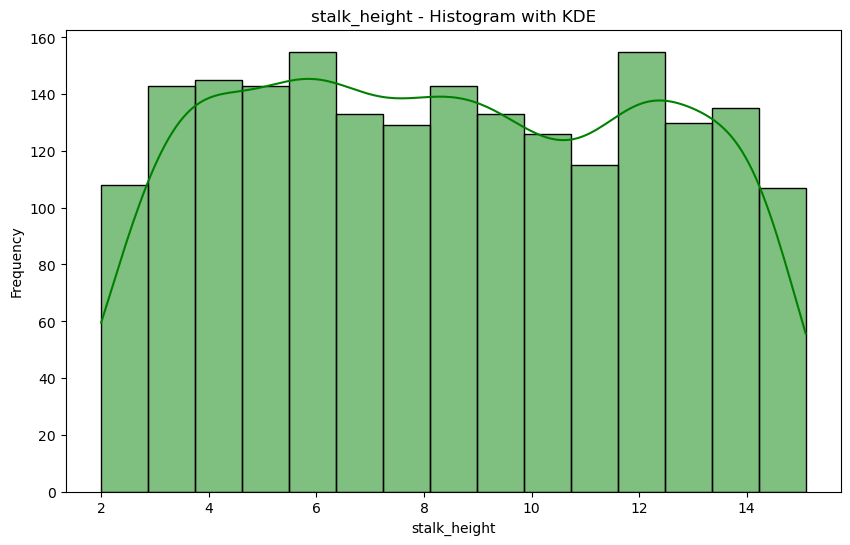

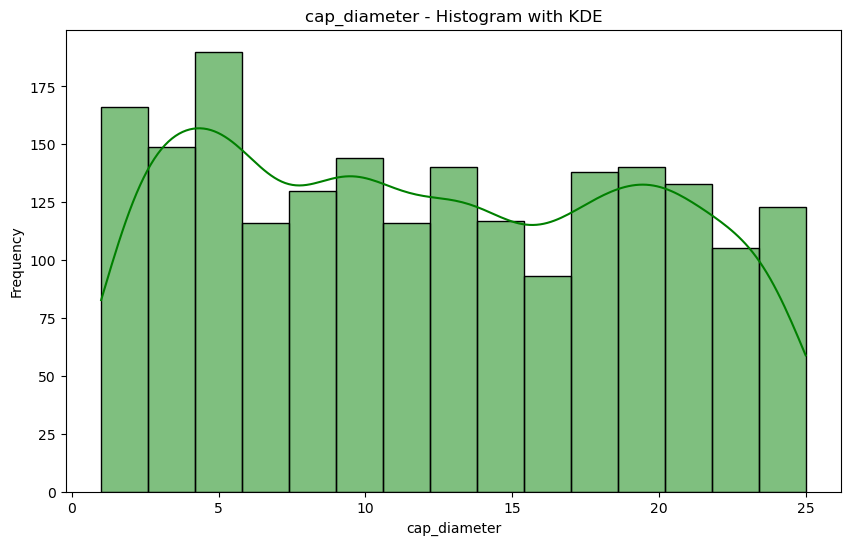

In [8]:
# HISTOGRAM
for col in num_col.columns:
    plt.figure(figsize = (10,6))
    sns.histplot(df[col], kde = True, color = 'green', bins = 15)
    plt.title(f'{col} - Histogram with KDE')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

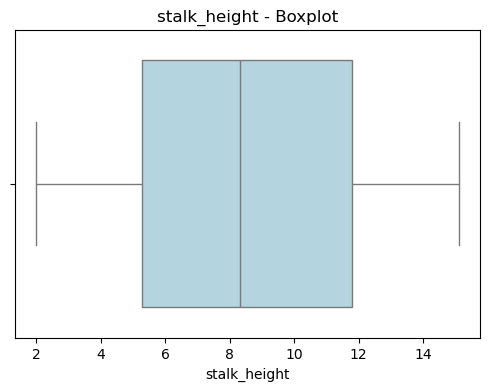

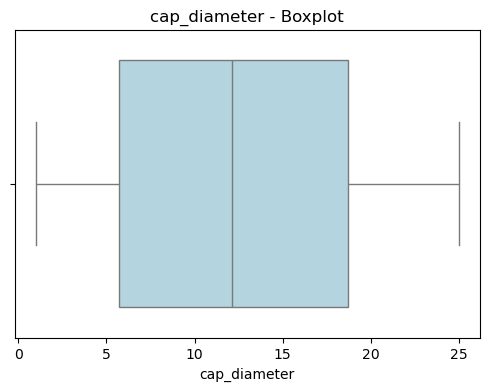

In [9]:
# BOXPLOT
for col in num_col.columns:
    plt.figure(figsize = (6,4))
    sns.boxplot(x = df[col], color = 'lightblue')
    plt.title(f'{col} - Boxplot')
    plt.show()

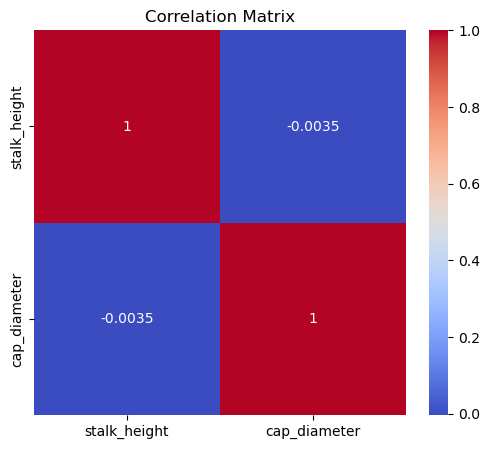

In [10]:
# Correlation heatmap
corr = num_col.corr()
plt.figure(figsize = (6,5))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.title("Correlation Matrix")
plt.show()

#### *2. Data Preprocessing*

In [11]:
# Encoding categorical columns
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df_encoded = df.copy()

for col in df_encoded.columns:
    df_encoded[col] = LE.fit_transform(df_encoded[col])
    
df_encoded.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,916,190
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,0,128,750
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,1,537,281
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,1,234,829
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,1,895,484


#### *3. Data Visualization*

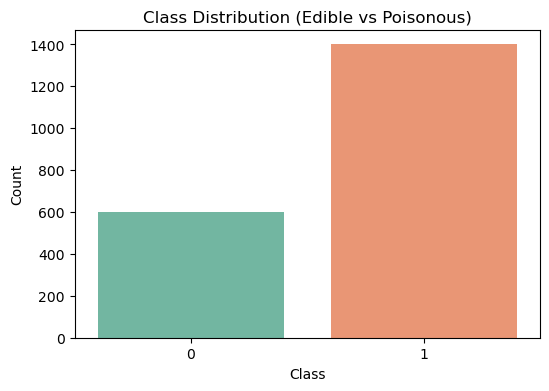

In [12]:
# Class Distribution 
plt.figure(figsize = (6, 4))
sns.countplot(x = 'class', data = df_encoded, palette = 'Set2')
plt.title("Class Distribution (Edible vs Poisonous)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

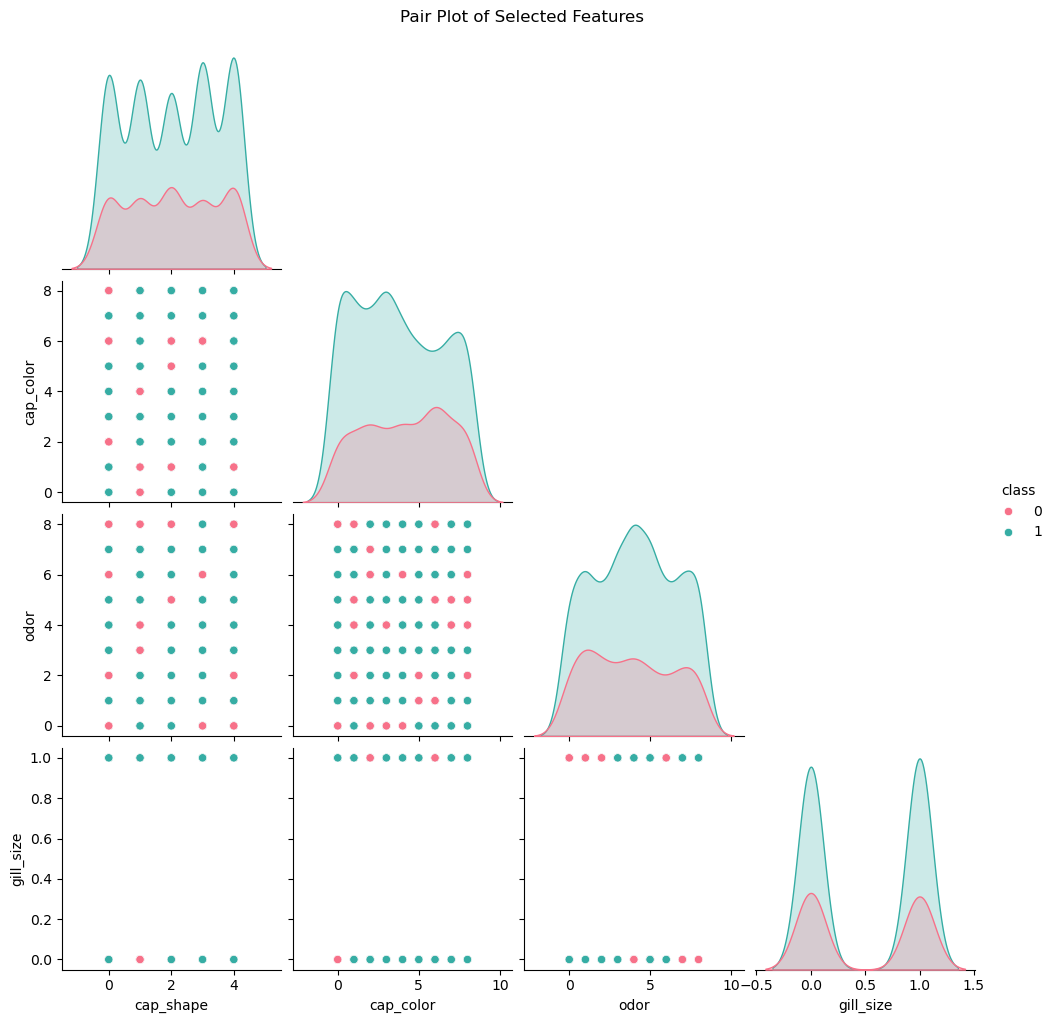

In [13]:
# Pair Plot for Feature Relationships
# Add target column for color encoding
selected_cols = ['cap_shape', 'cap_color', 'odor', 'gill_size', 'class']
sns.pairplot(df_encoded[selected_cols], hue = 'class', palette = 'husl', corner = True)
plt.suptitle("Pair Plot of Selected Features", y = 1.02)
plt.show()

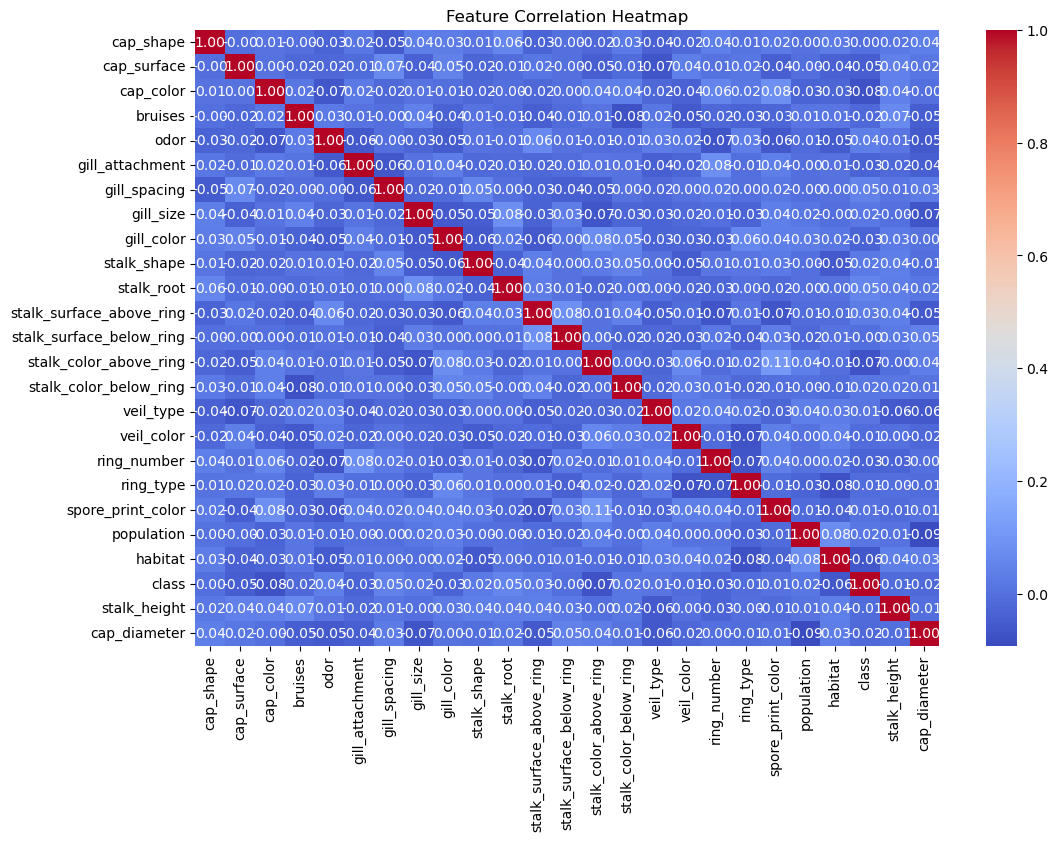

In [14]:
# Correlation Heatmap
plt.figure(figsize = (12, 8))
sns.heatmap(df_encoded.corr(), annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

Top features are 'odor', 'spore_print_color', 'gill_size', 'gill_color', 'bruises', 'stalk_surface_above_ring' and 'stalk_color_below_ring'

* Most features are weakly correlated with each other (values near 0.00), indicating:

* Low multicollinearity: good for algorithms like Logistic Regression or SVM.

* Exception: slight correlations between stalk_surface_above_ring and stalk_surface_below_ring (0.36), possibly due to similar surface textures.

#### *4. Model Building and Validation*

In [15]:
# Defin X and Y
X = df_encoded.drop(columns = ['class'])
Y = df_encoded['class']

In [16]:
# Scaling X values
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X_SS = SS.fit_transform(X)

In [17]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_SS, Y, test_size = 0.2, random_state = 42, stratify = Y)

In [18]:
# Model Building
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state = 42)
svm.fit(X_train, y_train)

# Predictions
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)
print("Training Accuracy: ", np.round(train_acc,3))
print("Test Accuracy: ", np.round(test_acc,3))

Training Accuracy:  0.887
Test Accuracy:  0.772


In [19]:
# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average = 'binary')
recall = recall_score(y_test, y_pred_test, average = 'binary')
f1 = f1_score(y_test, y_pred_test, average = 'binary')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7725
Precision: 0.7647058823529411
Recall: 0.975
F1-score: 0.8571428571428571


In [20]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_test)
print("\nClassification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.30      0.44       120
           1       0.76      0.97      0.86       280

    accuracy                           0.77       400
   macro avg       0.80      0.64      0.65       400
weighted avg       0.79      0.77      0.73       400



#### *5. Visualization of SVM Results*

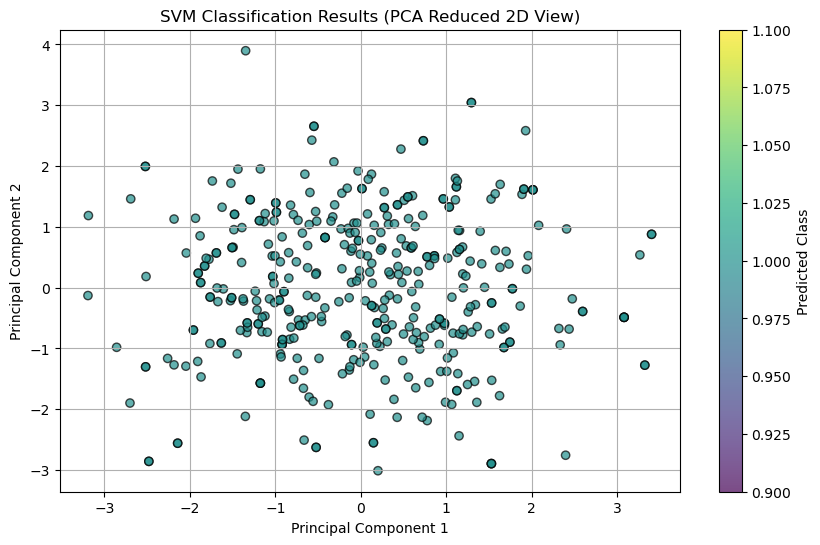

In [21]:
from sklearn.decomposition import PCA

# Reduce feature dimensions to 2 using PCA
pca = PCA(n_components = 2)
X_test_pca = pca.fit_transform(X_test)
X_train_pca = pca.transform(X_train)

# Train SVM again on reduced 2D data for visualization
svm_vis = SVC(kernel = 'rbf', random_state = 42)
svm_vis.fit(X_train_pca, y_train)

# Predict on test PCA-reduced data
y_pred_vis = svm_vis.predict(X_test_pca)

# Plotting decision regions
plt.figure(figsize = (10, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c = y_pred_vis, cmap = 'viridis', alpha = 0.7, edgecolors ='k')
plt.title("SVM Classification Results (PCA Reduced 2D View)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.colorbar(label = 'Predicted Class')
plt.show()

* The SVM model successfully classifies test data points into edible and poisonous categories.

* Most points are likely classified into one dominant class (as seen by uniform coloring).

* For clearer differentiation and error analysis, you can:

    - Add actual vs predicted class markers.

    - Plot misclassified points in a different color/shape.

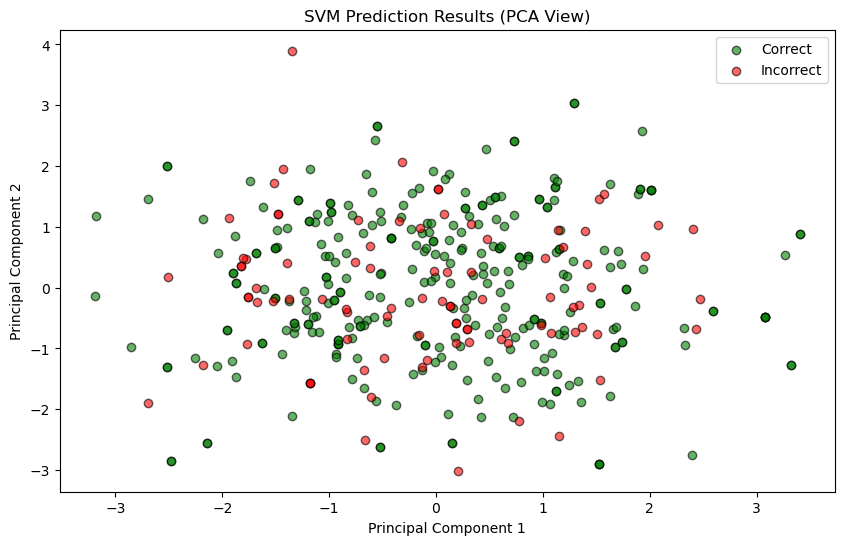

In [22]:
# visualize actual vs predicted classes
import matplotlib.pyplot as plt
import numpy as np

# PCA on test set
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Get predicted classes
y_pred = svm.predict(X_test)

# Identify correct and incorrect predictions
correct = y_pred == y_test
incorrect = ~correct

# Convert to numpy arrays for indexing
X_plot = np.array(X_test_pca)
y_test_array = np.array(y_test)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_plot[correct, 0], X_plot[correct, 1], c='green', label='Correct', alpha=0.6, edgecolor='k')
plt.scatter(X_plot[incorrect, 0], X_plot[incorrect, 1], c='red', label='Incorrect', alpha=0.6, edgecolor='k')
plt.title("SVM Prediction Results (PCA View)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


* **Green Dots:** Correctly classified mushroom samples.

* **Red Dots:** Incorrectly classified mushroom samples (misclassifications).

* **Axes:** These are not original features but Principal Component 1 and Principal Component 2, the two directions that explain most of the variance in the feature space.

* **Scatter Distribution:** The points are scattered based on PCA transformation, and their colors indicate how well the SVM model classified them.

#### *6: Parameter Tuning and Optimization*

In [31]:
# Define parameter grid to search
param_grid = {
    'C': [0.1, 0.001, 1, 10],                     # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],         # Kernel types
    'gamma': [0.001, 0.01, 0.5, 'scale'],            # Kernel coefficient for 'rbf', 'poly'
}   

In [32]:
# GridSearchCV setup
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(svm, param_grid, cv = 5, verbose = 1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 0.001, 1, 10],
                         'gamma': [0.001, 0.01, 0.5, 'scale'],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=1)

In [33]:
# Best parameters
print("Best Parameters Found:\n", grid.best_params_)

Best Parameters Found:
 {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}


In [34]:
# Best Model
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

In [35]:
# Evaluate performance
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.53      0.69       120
           1       0.83      1.00      0.91       280

    accuracy                           0.86       400
   macro avg       0.92      0.76      0.80       400
weighted avg       0.88      0.86      0.84       400

Accuracy: 0.8575


#### *7. Comparison and Analysis*

In [37]:
#  SVM Performance Comparison with Different Kernels
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

kernels = ['linear', 'poly', 'rbf']
results = {}

for kernel in kernels:
    clf = SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[kernel] = {
        "accuracy": acc,
        "report": classification_report(y_test, y_pred, output_dict=True)
    }
    print(f"\nKernel: {kernel}")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred))



Kernel: linear
Accuracy: 0.7
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       120
           1       0.70      1.00      0.82       280

    accuracy                           0.70       400
   macro avg       0.35      0.50      0.41       400
weighted avg       0.49      0.70      0.58       400


Kernel: poly
Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.41      0.56       120
           1       0.79      0.98      0.88       280

    accuracy                           0.81       400
   macro avg       0.85      0.70      0.72       400
weighted avg       0.83      0.81      0.78       400


Kernel: rbf
Accuracy: 0.7725
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.30      0.44       120
           1       0.76      0.97      0.86       280

    accuracy         

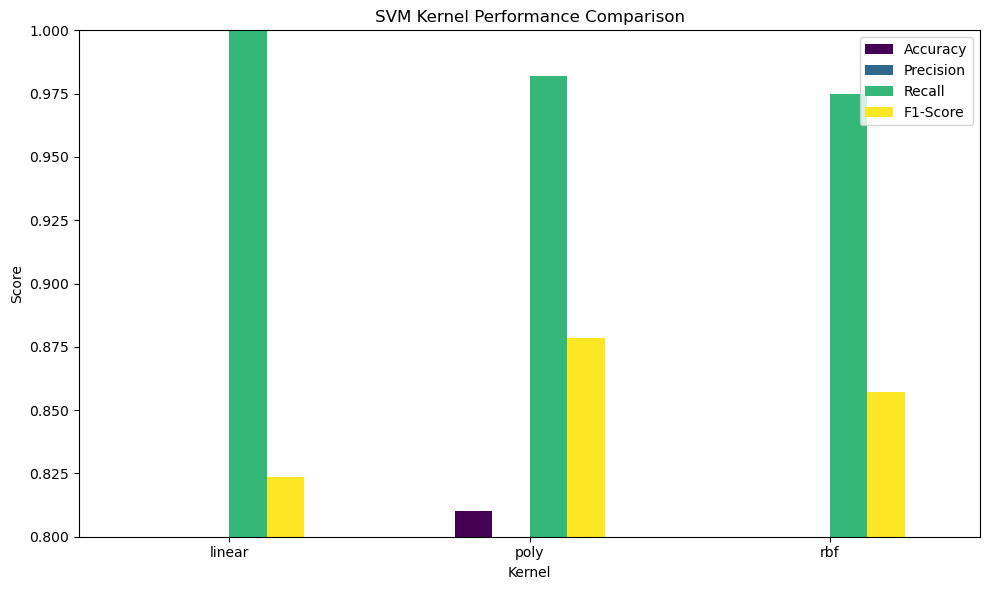

In [48]:
import matplotlib.pyplot as plt

result_df.set_index('Kernel')[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(
    kind = 'bar', figsize = (10, 6), colormap = 'viridis')
plt.title("SVM Kernel Performance Comparison")
plt.ylabel("Score")
plt.ylim(0.8, 1.0)
plt.xticks(rotation = 0)
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

#### *Results Summary*
| Kernel Type | Accuracy | Precision | Recall | F1-Score |
| ----------- | -------- | --------- | ------ | -------- |
| Linear      | 0.70     | 0.00      | 0.00   | 0.00     |
| Polynomial  | **0.81** | 0.91      | 0.41   | 0.56     |
| RBF         | 0.77     | 0.84      | 0.30   | 0.44     |

The **Polynomial kernel** is the most effective choice for this classification task, offering the best trade-off between precision and recall.

#### *SVM Strengths and Weaknesses (Based on EDA and Visualizations)*
| Strengths                                                                  | Weaknesses                                                                  |
| -------------------------------------------------------------------------- | --------------------------------------------------------------------------- |
| Effective in high-dimensional spaces (Mushroom dataset is all categorical) | Doesn't scale well with very large datasets                                 |
| Handles non-linear boundaries well (esp. with RBF/polynomial kernels)      | Performance depends heavily on hyperparameter tuning (C, kernel, gamma)     |
| Robust against overfitting (especially with proper C & gamma tuning)       | Hard to interpret feature importance (unlike decision trees, Random Forest) |
| Suitable for binary classification (like edible vs poisonous)              | Requires encoding for categorical features                                  |
